In [ ]:
!wget -q -O student.zip "http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
!unzip -q student.zip

import pandas as pd
df = pd.read_csv("student-mat.csv", sep=";")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset shape: (395, 33)
Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [ ]:
df['pass'] = (df['G3'] >= 10).astype(int)
df.drop('G3', axis=1, inplace=True)
df.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1


In [ ]:
# Separate features and target
X = df.drop('pass', axis=1)
y = df['pass']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = ['age','Medu','Fedu','traveltime','studytime','failures',
                'famrel','freetime','goout','Dalc','Walc','health',
                'absences','G1','G2']
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", X_encoded.shape)

# Split into train/test sets (80/20 stratified)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])


Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numeric columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
Shape after encoding: (395, 41)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train on the training set
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions and predicted probabilities
y_pred_lr  = lr.predict(X_test)
y_pred_rf  = rf.predict(X_test)
y_prob_lr  = lr.predict_proba(X_test)[:,1]
y_prob_rf  = rf.predict_proba(X_test)[:,1]

# Logistic Regression metrics
print("Logistic Regression Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1 Score :", f1_score(y_test, y_pred_lr))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_lr))

# Random Forest metrics
print("\nRandom Forest Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))


Logistic Regression Metrics:
Accuracy : 0.8860759493670886
Precision: 0.9583333333333334
Recall   : 0.8679245283018868
F1 Score : 0.9108910891089109
ROC AUC  : 0.9542815674891147

Random Forest Metrics:
Accuracy : 0.8860759493670886
Precision: 0.9583333333333334
Recall   : 0.8679245283018868
F1 Score : 0.9108910891089109
ROC AUC  : 0.940856313497823


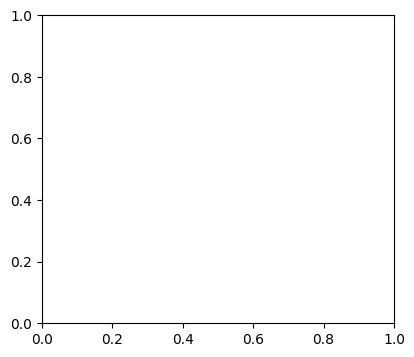

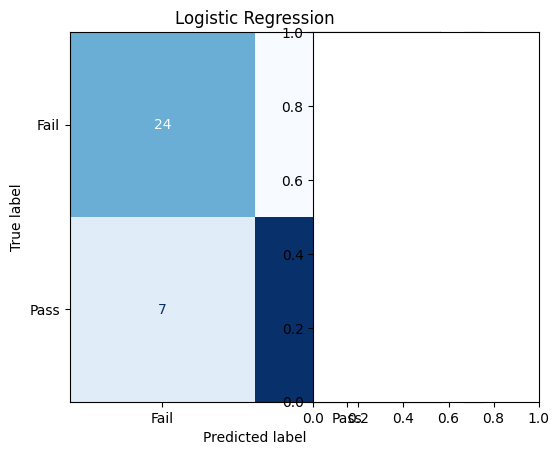

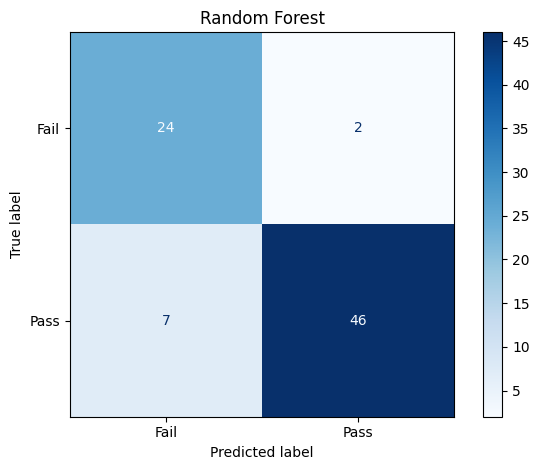

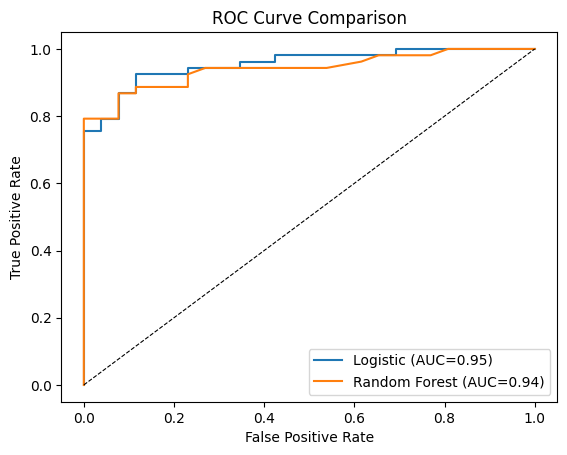

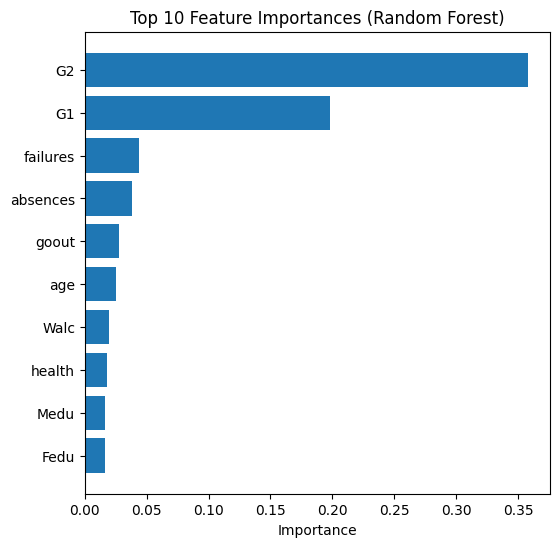

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve

# Confusion matrices for each model
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Fail','Pass'], cmap=plt.cm.Blues)
plt.title("Logistic Regression")

plt.subplot(1,2,2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Fail','Pass'], cmap=plt.cm.Blues)
plt.title("Random Forest")

plt.tight_layout()
plt.show()

# ROC curves for both models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic (AUC={roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0,1],[0,1],'k--', linewidth=0.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Random Forest feature importances (top 10)
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # top 10 features
plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices][::-1])
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()
